<a href="https://colab.research.google.com/github/victorvieirar/Estudo-de-G-nero-e-Etnias/blob/master/Trabalho_Extra_Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade avaliativa extra - 2ª unidade**


---

Análise de dados por etnia e gênero na graduação e pós-graduação ao decorrer dos tempos na UFRN.
Componentes: Pedro Hugo e Victor Vieira.

Para dar início a esta análise, iremos procurar em http://dados.ufrn.br/ para extrair os dados dos 5 programas de pós graduação e 5 cursos de graduação de cada centro da UFRN. Os centros são: **Centro de Biociências**, **Centro de Ciências da Saúde**, **Centro de Ciências Exatas e da Terra**, **Centro de Ciências Humanas, Letras e Artes**, **Centro de Ciências Sociais Aplicadas**, **Centro de Tecnologia**, além do **IMD** e **ECT**.

*   **Centro de Biociência (CB)** : Biologia, Biomedicina, Ecologia e Engenharia de Aquicultura;
*   **Centro de Ciências da Saúde (CCS)** : Fonodiaulogia, Nutrição, Medicina, Enfermagem e Fisioterapia;
*   **Centro de Ciências Exatas e da Terra (CCET)**: Física, Matemática, Geologia, Química e Meteorologia;
*   **Centro de Ciências Humanas, Letras e Artes(CCHLA)**: Letras, Artes, Geografia, História e Psicologia;
*   **Centro de Ciências Sociais Aplicadas (CCSA)**: Direito, Administração, Turismo, Ciências Contábeis e Economia;
*   **Centro de Tecnologia (CT)**: Engenharia Elétrica, Engenharia Mecânica, Engenharia Mecatrônica, Engenharia Civil e Engenharia Química;
*   **Instituto Metrópole Digital (IMD)**: Tecnologia da Informação;
*   **Escola de Ciências e Tecnologia**: Ciências e Tecnologia.









In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fazendo a leitura de todos que ingressaram em seus respectivos anos
list_2009 = pd.read_csv("discentes-2009.csv", sep=";")
list_2010 = pd.read_csv("discentes-2010.csv", sep=";")
list_2011 = pd.read_csv("discentes-2011.csv", sep=";")
list_2012 = pd.read_csv("discentes-2012.csv", sep=";")
list_2013 = pd.read_csv("discentes-2013.csv", sep=";")
list_2014 = pd.read_csv("discentes-2014.csv", sep=";")
list_2015 = pd.read_csv("discentes-2015.csv", sep=";")
list_2016 = pd.read_csv("discentes-2016.csv", sep=";")
list_2017 = pd.read_csv("discentes-2017.csv", sep=";")
list_2018 = pd.read_csv("discentes-2018.csv", sep=";")
list_2019 = pd.read_csv("discentes-2019.csv", sep=";")

In [0]:

# Agora vamos unir todos os datasets em um só.
list_fusion = pd.concat([list_2009, list_2010, list_2011, list_2012, list_2013, list_2014, list_2015, list_2016, list_2017, list_2018, list_2019], axis = 0)
list_fusion.head()

In [0]:
# Apaga linhas com valores nulos
list_fusion = list_fusion.dropna()

In [0]:
#Separação em curso e programas de pós.

discentes_graduacao = list_fusion[list_fusion["nivel_ensino"] == "GRADUAÇÃO"].dropna()

discentes_pos_graduacao = list_fusion[list_fusion["nivel_ensino"].isin(['LATO SENSU', 'MESTRADO', 'DOUTORADO', 'RESIDÊNCIA', 'STRICTO SENSU'])].dropna()

Separação de cursos e programas

In [0]:
# Cursos da graduação escolhidos para análise
base = ["CIÊNCIAS BIOLÓGICAS", "BIOMEDICINA", "ENGENHARIA DE AQUICULTURA", "ECOLOGIA",
         "NUTRIÇÃO", "ENFERMAGEM", "FONODIAULOGIA", "MEDICINA", "FISIOTERAPIA",
         "METEOROLOGIA", "FÍSICA", "MATEMÁTICA", "GEOLOGIA", "QUÍMICA",
         "ARTES VISUAIS", "HISTÓRIA", "GEOGRAFIA", "LETRAS", "PSICOLOGIA",
         "CIÊNCIAS CONTÁBEIS", "DIREITO", "TURISMO", "CIÊNCIAS ECONÔMICAS", "ADMINISTRAÇÃO",
         "ENGENHARIA MECATRÔNICA", "ENGENHARIA CIVIL", "ENGENHARIA ELÉTRICA", "ENGENHARIA MECÂNICA", "ENGENHARIA QUÍMICA",
         "TECNOLOGIA DA INFORMAÇÃO",
         "CIÊNCIAS E TECNOLOGIA"]

# Apenas os cursos da análise
discentes_graduacao = discentes_graduacao.loc[discentes_graduacao["nome_curso"].isin(base)]

discentes_graduacao["nome_curso"].value_counts().sort_index(ascending = True)

In [0]:
# Programas da pós-graduação escolhidos para análise
programas = ['PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO',
            'PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA DE SOFTWARE',
            'PROGRAMA DE PÓS-GRADUAÇÃO EM SISTEMAS E COMPUTAÇÃO',
            'PROGRAMA DE PÓS-GRADUAÇÃO EM INOVAÇÃO EM TECNOLOGIAS EDUCACIONAIS',
            'PROGRAMA DE PÓS-GRADUAÇÃO EM BIOINFORMÁTICA']

discentes_pos_graduacao = discentes_pos_graduacao.loc[discentes_pos_graduacao["nome_unidade"].isin(programas)]

discentes_pos_graduacao["nome_unidade"].value_counts().sort_index(ascending = True)


# Agora façamos uma análise do sexo dos ingressantes de todos os cursos da graduação escolhidos.

In [0]:
import seaborn as sns
fig, ax = plt.subplots(1,3,figsize=(25, 5))

list_fusion = list_fusion[list_fusion.sexo != "N"]

sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = discentes_graduacao, ax=ax[0], palette=  {"M":"C0", "F":"C6"})
sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = discentes_pos_graduacao, ax=ax[1], palette=  {"M":"C0", "F":"C6"})
sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = list_fusion, ax=ax[2], palette= {"M":"C0", "F":"C6"})

ax[0].set_title("Graduação")
ax[0].set_xlabel("Ano de Ingresso")
ax[0].set_ylabel("Quantidade")

ax[1].set_title("Pós-Graduação")
ax[1].set_xlabel("Ano de Ingresso")
ax[1].set_ylabel("Quantidade")

ax[2].set_title("UFRN")
ax[2].set_xlabel("Ano de Ingresso")
ax[2].set_ylabel("Quantidade")


plt.show()

Podemos notar que a quantidade homens é predominante em todas as tabelas. Porém, a partir de 2015 o número de mulheres começou a crescer, tendo, porém, uma queda em 2019. Se os dados futuros tenderem a seguir essa linha de crescimento, poderá chegar a um equilíbrio entre homens e mulheres na UFRN, não tendo uma diferença tão acentuada entre os dois.

# Agora façamos uma análise da etnia dos ingressantes de todos os cursos da graduação escolhidos.

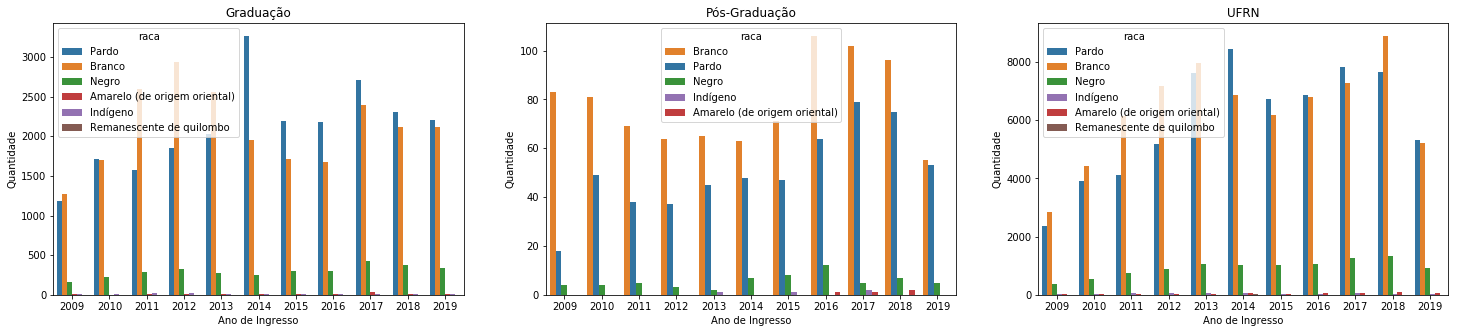

In [0]:
fig, ax = plt.subplots(1,3,figsize=(25, 5))

list_fusion = list_fusion[list_fusion.raca != "Não Informado"]
discentes_graduacao = discentes_graduacao[discentes_graduacao.raca != "Não Informado"]
discentes_pos_graduacao = discentes_pos_graduacao[discentes_pos_graduacao.raca != "Não Informado"]

palette = {"Pardo":"C0", "Branco":"C1", "Negro":"C2", "Amarelo (de origem oriental)":"C3", "Indígeno":"C4", "Remanescente de quilombo":"C5"}

sns.countplot(x = 'ano_ingresso', hue = 'raca', data = discentes_graduacao, ax=ax[0], palette = palette)
sns.countplot(x = 'ano_ingresso', hue = 'raca', data = discentes_pos_graduacao, ax=ax[1], palette = palette)
sns.countplot(x = 'ano_ingresso', hue = 'raca', data = list_fusion, ax=ax[2], palette = palette)

ax[0].set_title("Graduação")
ax[0].set_xlabel("Ano de Ingresso")
ax[0].set_ylabel("Quantidade")

ax[1].set_title("Pós-Graduação")
ax[1].set_xlabel("Ano de Ingresso")
ax[1].set_ylabel("Quantidade")

ax[2].set_title("UFRN")
ax[2].set_xlabel("Ano de Ingresso")
ax[2].set_ylabel("Quantidade")


plt.show()

Claramente a quantidade de Brancos e pardos é de forma gigantesca maior que todas as outras raças. Sendo na pós-graduação onde os negros estão menos presentes, porém onde os amarelos são mais presentes, demonstrando uma possível vocação de inteligência ou esforço para essa raça.